In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror{font-family:Consolas; font-size:17pt;}
div.output{font-size:17pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:17pt;}
div.prompt{min-width:70px;}
"""))

In [2]:
from tensorflow.keras.datasets import mnist # mnist 데이터셋
import tensorflow.keras.utils as utils # 원핫인코딩
from tensorflow.keras.models import Sequential # 모델
from tensorflow.keras.layers import Dense, Activation # model.add시
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(3)

In [3]:
# 1. 데이터 셋 준비하기
# 훈련셋, 검증 셋 분리
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

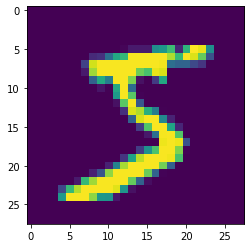

In [6]:
plt.imshow(X_train[0])

In [7]:
Y_train[0]

5

In [8]:
# 훈련셋과 검증셋 분리(X_train, Y_train을 검증셋과 훈련셋으로 분리)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [9]:
# 훈련셋 - 학습할 때 사용
X_train.shape, Y_train.shape

((50000, 28, 28), (50000,))

In [10]:
# 검증셋 - 학습할 때 사용
len(X_val), len(Y_val)

(10000, 10000)

In [11]:
# 훈련셋 - 모델 평가할 때 사용모델 평가할 때 사용
len(X_test), len(Y_test)

(10000, 10000)

In [12]:
X_train.shape, X_val.shape, X_test.shape

((50000, 28, 28), (10000, 28, 28), (10000, 28, 28))

In [13]:
# normalize 하기 위해 색상값으로 나눠
X_train = X_train.reshape(50000,784).astype('float32') / 255.0
X_val   = X_val.reshape(10000,784).astype('float32')/255.0
X_test = X_test.reshape(10000,784).astype('float32')/255.0

In [14]:
X_train.shape, X_val.shape, X_test.shape

((50000, 784), (10000, 784), (10000, 784))

In [15]:
# 훈련셋과 검증셋 700개, 300개씩만 가져옴
train_rand_idxs = np.random.choice(50000,700)
val_rand_idxs   = np.random.choice(10000,300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

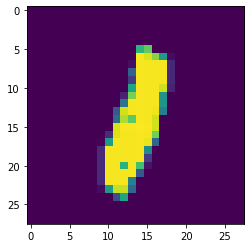

In [16]:
plt.imshow(X_train[0].reshape(28,28))

In [17]:
Y_train[0]

1

In [18]:
Y_train.shape, Y_val.shape, Y_test.shape

((700,), (300,), (10000,))

In [19]:
# 원 핫 인코딩 = 라벨링 전환 
# 0 => 1 0 0 0 0 0 0 0 0 0 
# 3 => 0 0 0 1 0 0 0 0 0 0 
Y_train = utils.to_categorical(Y_train)
Y_val   = utils.to_categorical(Y_val)
Y_test  = utils.to_categorical(Y_test)

In [31]:
Y_train.shape, Y_val.shape, Y_test.shape

((700, 10), (300, 10), (10000, 10))

In [20]:
Y_train[0]
# 귀찮은 데이터 전처리 끝

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

# 3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, 
                validation_data=(X_val, Y_val))

Epoch 1/1000
70/70 [==============================] - 1s 15ms/step - loss: 2.2990 - accuracy: 0.1211 - val_loss: 2.2047 - val_accuracy: 0.1933
Epoch 2/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1828 - accuracy: 0.2158 - val_loss: 2.1075 - val_accuracy: 0.2367
Epoch 3/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1150 - accuracy: 0.2028 - val_loss: 2.0406 - val_accuracy: 0.2633
Epoch 4/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.0286 - accuracy: 0.2367 - val_loss: 1.9757 - val_accuracy: 0.2833
Epoch 5/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.9541 - accuracy: 0.2434 - val_loss: 1.9309 - val_accuracy: 0.2467
Epoch 6/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.9085 - accuracy: 0.2381 - val_loss: 1.8908 - val_accuracy: 0.2700
Epoch 7/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.8851 - accuracy: 0.3010 - val_loss: 1.8584 - val_accuracy: 0.3067
Epoch

70/70 [==============================] - 0s 1ms/step - loss: 1.0446 - accuracy: 0.6603 - val_loss: 1.4040 - val_accuracy: 0.4667
Epoch 116/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0564 - accuracy: 0.6243 - val_loss: 1.4002 - val_accuracy: 0.4733
Epoch 117/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0593 - accuracy: 0.6145 - val_loss: 1.4016 - val_accuracy: 0.4733
Epoch 118/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0678 - accuracy: 0.6251 - val_loss: 1.4029 - val_accuracy: 0.4733
Epoch 119/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0511 - accuracy: 0.6586 - val_loss: 1.4025 - val_accuracy: 0.4733
Epoch 120/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0259 - accuracy: 0.6417 - val_loss: 1.3967 - val_accuracy: 0.4633
Epoch 121/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0474 - accuracy: 0.6374 - val_loss: 1.3914 - val_accuracy: 0.4700
Epoch 1

Epoch 172/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9086 - accuracy: 0.6903 - val_loss: 1.4474 - val_accuracy: 0.4700
Epoch 173/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0084 - accuracy: 0.6407 - val_loss: 1.4535 - val_accuracy: 0.4700
Epoch 174/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0129 - accuracy: 0.6743 - val_loss: 1.4368 - val_accuracy: 0.4700
Epoch 175/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9414 - accuracy: 0.6617 - val_loss: 1.4423 - val_accuracy: 0.4633
Epoch 176/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9604 - accuracy: 0.6579 - val_loss: 1.4458 - val_accuracy: 0.4667
Epoch 177/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0061 - accuracy: 0.6416 - val_loss: 1.4475 - val_accuracy: 0.4667
Epoch 178/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9704 - accuracy: 0.6720 - val_loss: 1.4474 - val_accuracy:

Epoch 229/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9587 - accuracy: 0.6680 - val_loss: 1.5203 - val_accuracy: 0.4767
Epoch 230/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8598 - accuracy: 0.6976 - val_loss: 1.5355 - val_accuracy: 0.4767
Epoch 231/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.9176 - accuracy: 0.6867 - val_loss: 1.5093 - val_accuracy: 0.4700
Epoch 232/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9007 - accuracy: 0.7033 - val_loss: 1.5202 - val_accuracy: 0.4833
Epoch 233/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9079 - accuracy: 0.7024 - val_loss: 1.5279 - val_accuracy: 0.4800
Epoch 234/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8714 - accuracy: 0.6805 - val_loss: 1.5147 - val_accuracy: 0.4800
Epoch 235/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9244 - accuracy: 0.6670 - val_loss: 1.5374 - val_accuracy:

Epoch 286/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9548 - accuracy: 0.6797 - val_loss: 1.6023 - val_accuracy: 0.4667
Epoch 287/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8924 - accuracy: 0.6769 - val_loss: 1.5891 - val_accuracy: 0.4800
Epoch 288/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8682 - accuracy: 0.6903 - val_loss: 1.6035 - val_accuracy: 0.4767
Epoch 289/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8721 - accuracy: 0.6823 - val_loss: 1.6025 - val_accuracy: 0.4767
Epoch 290/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7913 - accuracy: 0.7293 - val_loss: 1.5912 - val_accuracy: 0.4667
Epoch 291/1000
70/70 [==============================] - 0s 990us/step - loss: 0.8845 - accuracy: 0.6958 - val_loss: 1.6091 - val_accuracy: 0.4633
Epoch 292/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8580 - accuracy: 0.7221 - val_loss: 1.6015 - val_accurac

Epoch 343/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8695 - accuracy: 0.6842 - val_loss: 1.6764 - val_accuracy: 0.4600
Epoch 344/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8306 - accuracy: 0.7008 - val_loss: 1.6677 - val_accuracy: 0.4700
Epoch 345/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8378 - accuracy: 0.7011 - val_loss: 1.6933 - val_accuracy: 0.4700
Epoch 346/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7848 - accuracy: 0.7130 - val_loss: 1.6640 - val_accuracy: 0.4600
Epoch 347/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8370 - accuracy: 0.7105 - val_loss: 1.6866 - val_accuracy: 0.4700
Epoch 348/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8543 - accuracy: 0.6891 - val_loss: 1.6751 - val_accuracy: 0.4633
Epoch 349/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8771 - accuracy: 0.6917 - val_loss: 1.6802 - val_accuracy:

Epoch 400/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7873 - accuracy: 0.7331 - val_loss: 1.7583 - val_accuracy: 0.4600
Epoch 401/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7922 - accuracy: 0.7272 - val_loss: 1.7586 - val_accuracy: 0.4567
Epoch 402/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7840 - accuracy: 0.7122 - val_loss: 1.7746 - val_accuracy: 0.4633
Epoch 403/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8171 - accuracy: 0.7107 - val_loss: 1.7821 - val_accuracy: 0.4667
Epoch 404/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8197 - accuracy: 0.7125 - val_loss: 1.7630 - val_accuracy: 0.4667
Epoch 405/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7210 - accuracy: 0.7306 - val_loss: 1.7703 - val_accuracy: 0.4667
Epoch 406/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8169 - accuracy: 0.7072 - val_loss: 1.7845 - val_accuracy:

Epoch 513/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7410 - accuracy: 0.7375 - val_loss: 1.9555 - val_accuracy: 0.4600
Epoch 514/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7712 - accuracy: 0.7293 - val_loss: 1.9299 - val_accuracy: 0.4567
Epoch 515/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7179 - accuracy: 0.7258 - val_loss: 1.9373 - val_accuracy: 0.4667
Epoch 516/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7245 - accuracy: 0.7408 - val_loss: 1.9346 - val_accuracy: 0.4700
Epoch 517/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7542 - accuracy: 0.7268 - val_loss: 1.9419 - val_accuracy: 0.4567
Epoch 518/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7302 - accuracy: 0.7421 - val_loss: 1.9286 - val_accuracy: 0.4667
Epoch 519/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7536 - accuracy: 0.7375 - val_loss: 1.9306 - val_accuracy:

Epoch 570/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7016 - accuracy: 0.7573 - val_loss: 1.9916 - val_accuracy: 0.4500
Epoch 571/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7584 - accuracy: 0.7469 - val_loss: 2.0232 - val_accuracy: 0.4567
Epoch 572/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7050 - accuracy: 0.7717 - val_loss: 1.9964 - val_accuracy: 0.4500
Epoch 573/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.7710 - val_loss: 2.0137 - val_accuracy: 0.4533
Epoch 574/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7295 - accuracy: 0.7387 - val_loss: 2.0198 - val_accuracy: 0.4567
Epoch 575/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7299 - accuracy: 0.7638 - val_loss: 2.0247 - val_accuracy: 0.4567
Epoch 576/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7420 - accuracy: 0.7372 - val_loss: 2.0249 - val_accuracy:

Epoch 627/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.7449 - val_loss: 2.1098 - val_accuracy: 0.4567
Epoch 628/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.7715 - val_loss: 2.0834 - val_accuracy: 0.4500
Epoch 629/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.7795 - val_loss: 2.0953 - val_accuracy: 0.4433
Epoch 630/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.7493 - val_loss: 2.1074 - val_accuracy: 0.4500
Epoch 631/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7437 - accuracy: 0.7321 - val_loss: 2.1102 - val_accuracy: 0.4533
Epoch 632/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7054 - accuracy: 0.7533 - val_loss: 2.1144 - val_accuracy: 0.4500
Epoch 633/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.7608 - val_loss: 2.1050 - val_accuracy:

Epoch 684/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.7439 - val_loss: 2.1694 - val_accuracy: 0.4433
Epoch 685/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6627 - accuracy: 0.7788 - val_loss: 2.1900 - val_accuracy: 0.4500
Epoch 686/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.7604 - val_loss: 2.2046 - val_accuracy: 0.4433
Epoch 687/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7083 - accuracy: 0.7602 - val_loss: 2.1865 - val_accuracy: 0.4467
Epoch 688/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6673 - accuracy: 0.7728 - val_loss: 2.1974 - val_accuracy: 0.4467
Epoch 689/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6632 - accuracy: 0.7690 - val_loss: 2.1753 - val_accuracy: 0.4433
Epoch 690/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7232 - accuracy: 0.7575 - val_loss: 2.1822 - val_accuracy:

Epoch 741/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.7681 - val_loss: 2.2676 - val_accuracy: 0.4433
Epoch 742/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6371 - accuracy: 0.7846 - val_loss: 2.2623 - val_accuracy: 0.4400
Epoch 743/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7419 - accuracy: 0.7525 - val_loss: 2.2674 - val_accuracy: 0.4367
Epoch 744/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7074 - accuracy: 0.7694 - val_loss: 2.2850 - val_accuracy: 0.4467
Epoch 745/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7156 - accuracy: 0.7444 - val_loss: 2.2573 - val_accuracy: 0.4467
Epoch 746/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.7598 - val_loss: 2.2673 - val_accuracy: 0.4433
Epoch 747/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7170 - accuracy: 0.7411 - val_loss: 2.2873 - val_accuracy:

Epoch 798/1000
70/70 [==============================] - 0s 926us/step - loss: 0.7064 - accuracy: 0.7757 - val_loss: 2.3528 - val_accuracy: 0.4433
Epoch 799/1000
70/70 [==============================] - 0s 969us/step - loss: 0.6505 - accuracy: 0.7798 - val_loss: 2.3857 - val_accuracy: 0.4500
Epoch 800/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6539 - accuracy: 0.7932 - val_loss: 2.3379 - val_accuracy: 0.4433
Epoch 801/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6450 - accuracy: 0.7777 - val_loss: 2.3505 - val_accuracy: 0.4500
Epoch 802/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6483 - accuracy: 0.7790 - val_loss: 2.3643 - val_accuracy: 0.4500
Epoch 803/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6767 - accuracy: 0.7541 - val_loss: 2.3587 - val_accuracy: 0.4500
Epoch 804/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6535 - accuracy: 0.7846 - val_loss: 2.3580 - val_accur

Epoch 855/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.7862 - val_loss: 2.4616 - val_accuracy: 0.4433
Epoch 856/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6178 - accuracy: 0.7699 - val_loss: 2.4516 - val_accuracy: 0.4467
Epoch 857/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.7846 - val_loss: 2.4382 - val_accuracy: 0.4500
Epoch 858/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6013 - accuracy: 0.7874 - val_loss: 2.4622 - val_accuracy: 0.4433
Epoch 859/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6237 - accuracy: 0.7813 - val_loss: 2.4358 - val_accuracy: 0.4433
Epoch 860/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6113 - accuracy: 0.7728 - val_loss: 2.4294 - val_accuracy: 0.4400
Epoch 861/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6382 - accuracy: 0.7854 - val_loss: 2.4837 - val_accuracy:

Epoch 912/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6522 - accuracy: 0.7794 - val_loss: 2.5295 - val_accuracy: 0.4400
Epoch 913/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6129 - accuracy: 0.8055 - val_loss: 2.5271 - val_accuracy: 0.4400
Epoch 914/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6483 - accuracy: 0.7995 - val_loss: 2.5269 - val_accuracy: 0.4400
Epoch 915/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6032 - accuracy: 0.7811 - val_loss: 2.5170 - val_accuracy: 0.4333
Epoch 916/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.7788 - val_loss: 2.5550 - val_accuracy: 0.4433
Epoch 917/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6890 - accuracy: 0.7950 - val_loss: 2.5474 - val_accuracy: 0.4433
Epoch 918/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.7754 - val_loss: 2.5218 - val_accuracy:

Epoch 969/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.8169 - val_loss: 2.5815 - val_accuracy: 0.4400
Epoch 970/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5901 - accuracy: 0.8059 - val_loss: 2.5997 - val_accuracy: 0.4433
Epoch 971/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.7908 - val_loss: 2.6018 - val_accuracy: 0.4433
Epoch 972/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5979 - accuracy: 0.8126 - val_loss: 2.5861 - val_accuracy: 0.4367
Epoch 973/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6046 - accuracy: 0.7871 - val_loss: 2.6002 - val_accuracy: 0.4400
Epoch 974/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.7801 - val_loss: 2.5872 - val_accuracy: 0.4367
Epoch 975/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6578 - accuracy: 0.7836 - val_loss: 2.6041 - val_accuracy:

In [22]:
# 1. 데이터 셋
# 훈련셋, 검증 셋 분리
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 훈련셋과 검증셋 분리(X_train, Y_train을 검증셋과 훈련셋으로 분리)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# normalize 하기 위해 색상값으로 나눠
X_train = X_train.reshape(50000,784).astype('float32') / 255.0
X_val   = X_val.reshape(10000,784).astype('float32')/255.0
X_test = X_test.reshape(10000,784).astype('float32')/255.0
# 훈련셋과 검증셋 700개, 300개씩만 가져옴
train_rand_idxs = np.random.choice(50000,700)
val_rand_idxs   = np.random.choice(10000,300)
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]
# 원 핫 인코딩 = 라벨링 전환 
Y_train = utils.to_categorical(Y_train)
Y_val   = utils.to_categorical(Y_val)
Y_test  = utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

# 3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="sgd", 
              metrics=['accuracy'])

# 4. 모델 학습시키기
custom_hist = CustomHistory()
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, 
                validation_data=(X_val, Y_val), verbose=0,
                callbacks=[custom_hist])
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

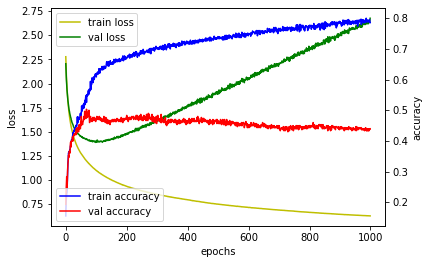

In [23]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")

In [41]:
# 모델 평가하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

313/313 [==============================] - 0s 887us/step - loss: 2.9332 - accuracy: 0.4307


In [43]:
print("loss :", loss_and_metrics[0])
print("accuracy :", loss_and_metrics[1])

loss : 2.9332408905029297
accuracy : 0.43070000410079956


In [45]:
# 6. 모델 저장 및 로드하기
model.save("model/mnist.h5")

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 1570      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


In [49]:
from tensorflow.keras.models import load_model
model2 = load_model('model/mnist.h5')

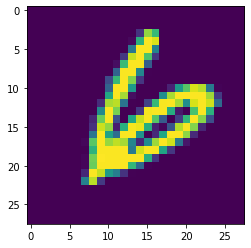

In [69]:
plt.imshow(X_val[0].reshape(28,28))

In [78]:
result = model2.predict(X_val[0].reshape(1,784))
result.argmax()

0

In [72]:
Y_val[0].argmax()

6

In [76]:
model2.predict_classes(X_val[0].reshape(1,784))

array([0], dtype=int64)

# 콜백 함수

In [26]:
import tensorflow as tf
np.random.seed(3)
class CustomHistory(tf.keras.callbacks.Callback):
    def __init__(self):
        self.epoch = 0
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))
        if self.epoch % 10 == 0:
            print("epoch:{}, loss:{}, val_loss:{}".format(self.epoch, 
                                            logs.get('loss'), logs.get('val_loss')))
        self.epoch += 1
# 1. 데이터 셋
# 훈련셋, 검증 셋 분리
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 훈련셋과 검증셋 분리(X_train, Y_train을 검증셋과 훈련셋으로 분리)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# normalize 하기 위해 색상값으로 나눠
X_train = X_train.reshape(50000,784).astype('float32') / 255.0
X_val   = X_val.reshape(10000,784).astype('float32')/255.0
X_test = X_test.reshape(10000,784).astype('float32')/255.0
# 훈련셋과 검증셋 700개, 300개씩만 가져옴
train_rand_idxs = np.random.choice(50000,700)
val_rand_idxs   = np.random.choice(10000,300)
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]
# 원 핫 인코딩 = 라벨링 전환 
Y_train = utils.to_categorical(Y_train)
Y_val   = utils.to_categorical(Y_val)
Y_test  = utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

# 3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="sgd", 
              metrics=['accuracy'])

# 4. 모델 학습시키기
custom_hist = CustomHistory()
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, 
                validation_data=(X_val, Y_val), verbose=0,
                callbacks=[custom_hist])

epoch:0, loss:2.3011484146118164, val_loss:2.2869575023651123
epoch:10, loss:1.8595068454742432, val_loss:1.9311376810073853
epoch:20, loss:1.6604671478271484, val_loss:1.7424495220184326
epoch:30, loss:1.5324047803878784, val_loss:1.6208696365356445
epoch:40, loss:1.4231899976730347, val_loss:1.532474398612976
epoch:50, loss:1.3159031867980957, val_loss:1.4617552757263184
epoch:60, loss:1.2352374792099, val_loss:1.4218436479568481
epoch:70, loss:1.1778897047042847, val_loss:1.385698676109314
epoch:80, loss:1.13136887550354, val_loss:1.3508617877960205
epoch:90, loss:1.0970778465270996, val_loss:1.3425209522247314
epoch:100, loss:1.0708743333816528, val_loss:1.3538572788238525
epoch:110, loss:1.04436194896698, val_loss:1.3461848497390747
epoch:120, loss:1.0220510959625244, val_loss:1.346843957901001
epoch:130, loss:1.0025478601455688, val_loss:1.353682041168213
epoch:140, loss:0.9835902452468872, val_loss:1.3761621713638306
epoch:150, loss:0.9662500023841858, val_loss:1.380736589431762

# 2. Early Stopping
- val_loss 값이 늘어나면 epoch를 다 수행하지 않고 조기 종료

In [7]:
from tensorflow.keras.datasets import mnist # mnist 데이터셋
import tensorflow.keras.utils as utils # 원핫인코딩
from tensorflow.keras.models import Sequential # 모델
from tensorflow.keras.layers import Dense, Activation # model.add시
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(3)
# 1. 데이터 셋
# 훈련셋, 검증 셋 분리
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 훈련셋과 검증셋 분리(X_train, Y_train을 검증셋과 훈련셋으로 분리)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# normalize 하기 위해 색상값으로 나눠
X_train = X_train.reshape(50000,784).astype('float32') / 255.0
X_val   = X_val.reshape(10000,784).astype('float32')/255.0
X_test = X_test.reshape(10000,784).astype('float32')/255.0
# 훈련셋과 검증셋 700개, 300개씩만 가져옴
train_rand_idxs = np.random.choice(50000,700)
val_rand_idxs   = np.random.choice(10000,300)
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]
# 원 핫 인코딩 = 라벨링 전환 
Y_train = utils.to_categorical(Y_train)
Y_val   = utils.to_categorical(Y_val)
Y_test  = utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

# 3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="sgd", 
              metrics=['accuracy'])

# 4. 모델 학습시키기
from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping() # 성급한 조기 종료
early_stopping = EarlyStopping(patience=30) # patience 인자 수만큼 loss가 오를 수 있음
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, 
                validation_data=(X_val, Y_val), verbose=1,
                callbacks=[early_stopping])

Epoch 1/1000
70/70 [==============================] - 0s 3ms/step - loss: 2.3065 - accuracy: 0.0718 - val_loss: 2.2712 - val_accuracy: 0.1367
Epoch 2/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.2443 - accuracy: 0.1627 - val_loss: 2.2133 - val_accuracy: 0.1333
Epoch 3/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1865 - accuracy: 0.1915 - val_loss: 2.1753 - val_accuracy: 0.1500
Epoch 4/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1502 - accuracy: 0.1900 - val_loss: 2.1475 - val_accuracy: 0.1500
Epoch 5/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1018 - accuracy: 0.2345 - val_loss: 2.1274 - val_accuracy: 0.1900
Epoch 6/1000
70/70 [==============================] - 0s 983us/step - loss: 2.0908 - accuracy: 0.2869 - val_loss: 2.1080 - val_accuracy: 0.2267
Epoch 7/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.0893 - accuracy: 0.2665 - val_loss: 2.0916 - val_accuracy: 0.2267
Epoc

70/70 [==============================] - 0s 1ms/step - loss: 1.1260 - accuracy: 0.6210 - val_loss: 1.3975 - val_accuracy: 0.4800
Epoch 116/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.1394 - accuracy: 0.5788 - val_loss: 1.4102 - val_accuracy: 0.4900
Epoch 117/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.1299 - accuracy: 0.5708 - val_loss: 1.4022 - val_accuracy: 0.4900
Epoch 118/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.1492 - accuracy: 0.5776 - val_loss: 1.3930 - val_accuracy: 0.4900
Epoch 119/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.1144 - accuracy: 0.6109 - val_loss: 1.4015 - val_accuracy: 0.4867
Epoch 120/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.1772 - accuracy: 0.5342 - val_loss: 1.3932 - val_accuracy: 0.4967
Epoch 121/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.1260 - accuracy: 0.5626 - val_loss: 1.4024 - val_accuracy: 0.4800
Epoch 1

Epoch 172/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9969 - accuracy: 0.6743 - val_loss: 1.3900 - val_accuracy: 0.5267
Epoch 173/1000
70/70 [==============================] - 0s 973us/step - loss: 0.9748 - accuracy: 0.6439 - val_loss: 1.3888 - val_accuracy: 0.5233
Epoch 174/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9590 - accuracy: 0.6780 - val_loss: 1.3954 - val_accuracy: 0.5200
Epoch 175/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0305 - accuracy: 0.6300 - val_loss: 1.3964 - val_accuracy: 0.5233
Epoch 176/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0619 - accuracy: 0.6141 - val_loss: 1.3990 - val_accuracy: 0.5167
Epoch 177/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9652 - accuracy: 0.6242 - val_loss: 1.4115 - val_accuracy: 0.5100
Epoch 178/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0062 - accuracy: 0.6560 - val_loss: 1.3975 - val_accurac

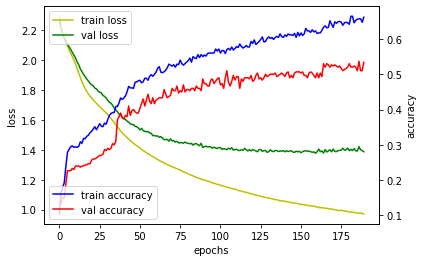

In [8]:
# 5.학습과정 표시하기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")

In [9]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print()
print('loss_and_metrics :', loss_and_metrics)

313/313 [==============================] - 0s 920us/step - loss: 1.4417 - accuracy: 0.5227

loss_and_metrics : [1.4417171478271484, 0.5227000117301941]


In [17]:
# 7. 모델 사용하기
idx = np.random.choice(X_test.shape[0],5)

In [24]:
xhat = X_test[idx]
xhat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [38]:
yhat = model.predict(xhat)
yhat = np.argmax(yhat, axis=1) # 예측치
yhat

array([7, 1, 0, 8, 0], dtype=int64)

In [29]:
np.argmax(Y_test[idx], axis=1) # 실제값

array([2, 1, 0, 8, 0], dtype=int64)

In [42]:
for i in range(5):
    print(i,"번째 실제값 :", np.argmax(Y_test[idx[i]]), "\t예측값 :",
         yhat[i])

0 번째 실제값 : 2 	예측값 : 7
1 번째 실제값 : 1 	예측값 : 1
2 번째 실제값 : 0 	예측값 : 0
3 번째 실제값 : 8 	예측값 : 8
4 번째 실제값 : 0 	예측값 : 0


In [40]:
# 8. 모델 저장하기
model.save('model/mnist.h5')

In [41]:
# 9. 모델 재사용하기
from tensorflow.keras.models import load_model
model2 = load_model("model/mnist.h5")
model2.predict_classes(xhat)

C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 1, 0, 8, 0], dtype=int64)

# 3. 위 모델(DNN)의 accuracy 늘리기
<ol>
    <li> 데이터 확보</li>
    <li> 레이어 </li>
    <li> 활성화함수 : 은닉층에는 주로 relu, elu, 
        output lay에서는 sigmoid(이진분류), softmax(다중분류)</li>
    <li> optimizer, epoch 등을 조정</li>

In [5]:
from tensorflow.keras.datasets import mnist # mnist 데이터셋
import tensorflow.keras.utils as utils # 원핫인코딩
from tensorflow.keras.models import Sequential # 모델
from tensorflow.keras.layers import Dense, Activation # model.add시
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(3)
# 1. 데이터 셋
# 훈련셋, 검증 셋 분리
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 훈련셋과 검증셋 분리(X_train, Y_train을 검증셋과 훈련셋으로 분리)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# normalize 하기 위해 색상값으로 나눠
X_train = X_train.reshape(50000,784).astype('float32') / 255.0
X_val   = X_val.reshape(10000,784).astype('float32')/255.0
X_test = X_test.reshape(10000,784).astype('float32')/255.0
# 훈련셋과 검증셋 700개, 300개씩만 가져옴
# train_rand_idxs = np.random.choice(50000,700)
# val_rand_idxs   = np.random.choice(10000,300)
# X_train = X_train[train_rand_idxs]
# Y_train = Y_train[train_rand_idxs]
# X_val = X_val[val_rand_idxs]
# Y_val = Y_val[val_rand_idxs]
# 원 핫 인코딩 = 라벨링 전환 
Y_train = utils.to_categorical(Y_train)
Y_val   = utils.to_categorical(Y_val)
Y_test  = utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=612, input_dim=784, activation="relu"))
model.add(Dense(units=1024, activation="relu"))
model.add(Dense(units=256, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

# 3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="nadam", 
              metrics=['accuracy'])

# 4. 모델 학습시키기
from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping() # 성급한 조기 종료
early_stopping = EarlyStopping(patience=10) # patience 인자 수만큼 loss가 오를 수 있음
hist = model.fit(X_train, Y_train, epochs=30, batch_size=10, 
                validation_data=(X_val, Y_val), verbose=1,
                callbacks=[early_stopping])

Epoch 1/30
5000/5000 [==============================] - 122s 24ms/step - loss: 0.3401 - accuracy: 0.8963 - val_loss: 0.1508 - val_accuracy: 0.9584
Epoch 2/30
5000/5000 [==============================] - 123s 25ms/step - loss: 0.1203 - accuracy: 0.9656 - val_loss: 0.0982 - val_accuracy: 0.9732
Epoch 3/30
5000/5000 [==============================] - 121s 24ms/step - loss: 0.0867 - accuracy: 0.9764 - val_loss: 0.1397 - val_accuracy: 0.9668
Epoch 4/30
5000/5000 [==============================] - 122s 24ms/step - loss: 0.0707 - accuracy: 0.9801 - val_loss: 0.0935 - val_accuracy: 0.9771
Epoch 5/30
5000/5000 [==============================] - 123s 25ms/step - loss: 0.0656 - accuracy: 0.9813 - val_loss: 0.1173 - val_accuracy: 0.9755
Epoch 6/30
5000/5000 [==============================] - 121s 24ms/step - loss: 0.0539 - accuracy: 0.9856 - val_loss: 0.1404 - val_accuracy: 0.9722
Epoch 7/30
5000/5000 [==============================] - 123s 25ms/step - loss: 0.0461 - accuracy: 0.9873 - val_loss: 0

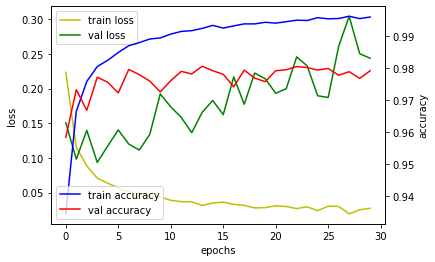

In [6]:
# 5.학습과정 표시하기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")

In [7]:
# 7. 모델 사용
idx = np.random.choice(X_test.shape[0],5)
xhat = X_test[idx]
yhat = model.predict_classes(xhat)
yhat

C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([6, 6, 7, 5, 0], dtype=int64)

In [8]:
# 8. 모델 평가하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print()
print('loss_and_metrics :', loss_and_metrics)

313/313 [==============================] - 1s 3ms/step - loss: 0.2893 - accuracy: 0.9797

loss_and_metrics : [0.2893327474594116, 0.9797000288963318]


In [ ]:
# 9. 모델 저장
model.save('model/mnist_v1.h5')

In [ ]:
# 10. 저장된 모델 재사용
from tensorflow.keras.models import load_model
model2 = load_model("model/mnist.h5")
model2.predict_classes(xhat)